In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

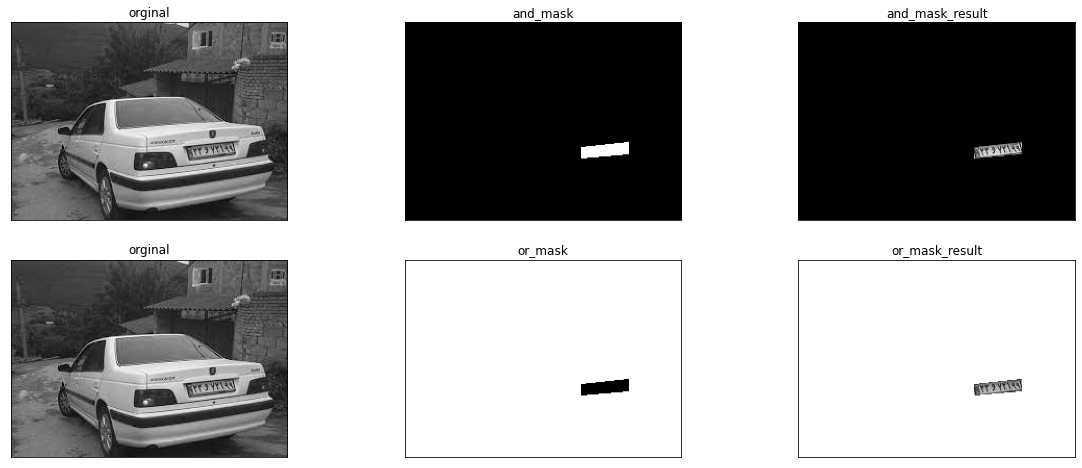

In [4]:
# Read the image in greyscale
image = cv2.imread('car.jpg', 0)
mask = np.zeros(image.shape, dtype=np.uint8)

# Replace all the value of car plate pixels with 255 (the max value) to create a mask with black background
parallelogram = np.array([[169, 120], [214, 115], [214, 126], [169, 130]], np.int32)
cv2.fillConvexPoly(mask, parallelogram, 255)

# Create same mask with white background
mask_cmp = 255-mask

# Mask input image with binary mask
and_mask_result = cv2.bitwise_and(image, mask)
or_mask_result = cv2.bitwise_or(image, mask_cmp)

fig, axes= plt.subplots(2, 3, figsize=(20, 8))
axes[0,0].imshow(image, 'gray')
axes[0,0].set_title('orginal')

axes[0,1].imshow(mask, 'gray')
axes[0,1].set_title('and_mask')

axes[0,2].imshow(and_mask_result, 'gray')
axes[0,2].set_title('and_mask_result')


axes[1,0].imshow(image, 'gray')
axes[1,0].set_title('orginal')

axes[1,1].imshow(mask_cmp, 'gray')
axes[1,1].set_title('or_mask')

axes[1,2].imshow(or_mask_result, 'gray')
axes[1,2].set_title('or_mask_result')

# Remove the x and y ticks
for i in range(axes.shape[0]):
  for j in range(axes.shape[1]):
    axes[i,j].set_xticks([])
    axes[i,j].set_yticks([])

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
